<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/ml_playground6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import graphviz
import pandas as pd
import numpy as np
import random
import math
from matplotlib import pyplot as plt

# Some functions to plot our points and draw the models
def plot_points(features, labels, size_of_points=100, ax=None):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    if ax is None:
      plt.scatter([s[0][0] for s in spam],
                  [s[0][1] for s in spam],
                  s = size_of_points,
                  color = 'cyan',
                  edgecolor = 'k',
                  marker = '^')
      plt.scatter([s[0][0] for s in ham],
                  [s[0][1] for s in ham],
                  s = size_of_points,
                  color = 'red',
                  edgecolor = 'k',
                  marker = 's')
      plt.xlabel('Lottery')
      plt.ylabel('Sale')
      plt.legend(['Spam','Ham'])
    else:
      ax.scatter([s[0][0] for s in spam],
                  [s[0][1] for s in spam],
                  s = size_of_points,
                  color = 'cyan',
                  edgecolor = 'k',
                  marker = '^')
      ax.scatter([s[0][0] for s in ham],
                  [s[0][1] for s in ham],
                  s = size_of_points,
                  color = 'red',
                  edgecolor = 'k',
                  marker = 's')
      ax.set_xlabel('Lottery')
      ax.set_ylabel('Sale')
      ax.legend(['Spam','Ham'])

def plot_model(X, y, model, size_of_points=100, ax=None):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
      plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
      plt.contour(xx, yy, Z,colors = 'k',linewidths = 1, levels=0)
      plot_points(X, y, size_of_points)
      plt.show()
    else:
      ax.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
      ax.contour(xx, yy, Z,colors = 'k',linewidths = 1, levels=0)
      plot_points(X, y, size_of_points, ax=ax)


# Ensemble

Techniques of combining weak learners into strong learner:
* **Bagging**:
  * build sub datasets by randomly draw from dataset (with replacement)
  * train (weak) models with these sub-datasets.
  * combine week models to build storng one. prediction is done by voting (if classification) or averaging (if regression)
* **Boosting**:
  * start by training a random model, the first weak learner. Evaluate it on entire dataset
  * shrink points with good pred; enlarge points with bad pred. Train 2nd weak learner on this modified dataset.
  * continue to build several weak models
  * combine the week models in same way as Bagging - i.e. voting or averaging.


# Spam email example

## Dataset
Dataset contains number of appearances of the words 'Lottery' and 'Sale' in each email and whether the email is spam or not.

In [2]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


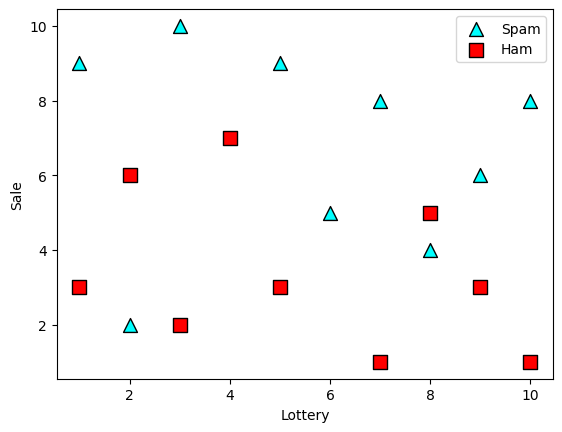

In [58]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

## Decision Tree Classifier

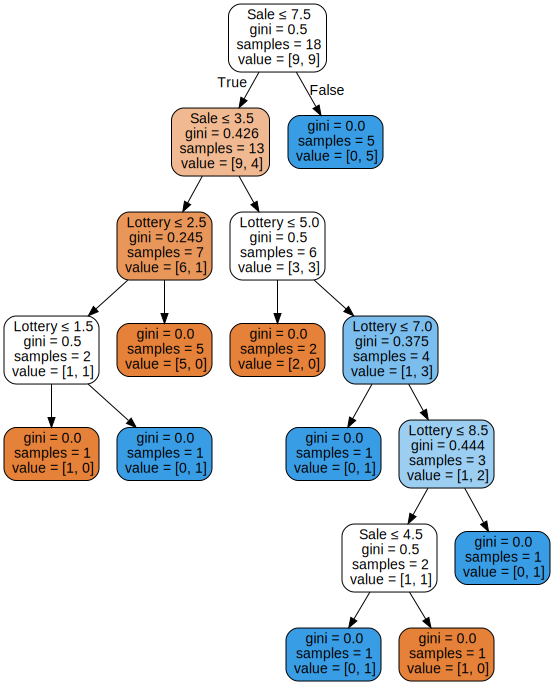

In [12]:
# fit a decision tree and visualise it

from sklearn.tree import DecisionTreeClassifier, export_graphviz

decision_tree = DecisionTreeClassifier()
decision_tree.fit(features, labels)

dot_data = export_graphviz(decision_tree, feature_names=['Lottery', 'Sale'],
                           filled=True, rounded=True, special_characters=True)
g = graphviz.Source(dot_data)
g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


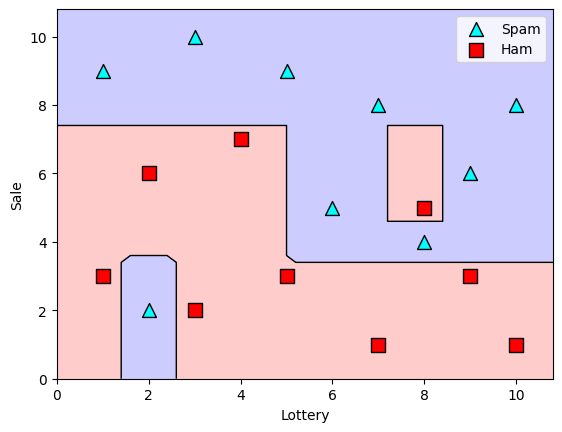

In [59]:
plot_model(features, labels, decision_tree)

## Manual Random Forest

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


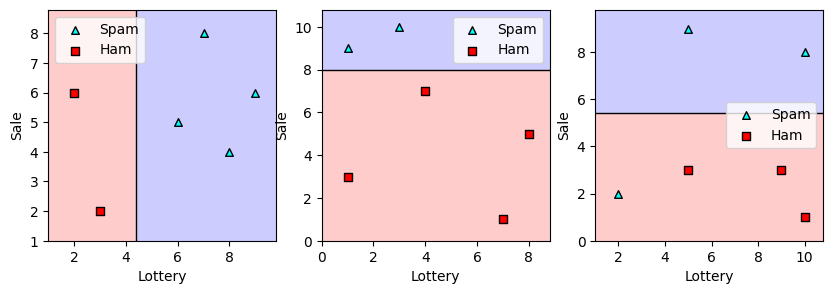

In [65]:
# divide the datasets (18 data points) into 3 subsets
weak_learners = []
dataset_size = len(spam_dataset)
num_subsets = 3
subset_size = dataset_size // num_subsets
fig, axes = plt.subplots(1, num_subsets, figsize=(10,3))
for i in range(3):
  start_idx = i*subset_size
  end_idx = start_idx + subset_size -1 # df index range is all inclusive, so -1
  sub_features = features.loc[start_idx:end_idx]
  sub_labels = labels.loc[start_idx:end_idx]
  # plot_points(sub_features, sub_labels, ax=axes[i])

  weak_learner = DecisionTreeClassifier(max_depth=1)
  weak_learner.fit(sub_features, sub_labels)
  weak_learners.append(weak_learner)
  plot_model(sub_features, sub_labels, weak_learner, size_of_points=30, ax=axes[i])

In [56]:
from IPython.display import display, HTML

html_content = '<div style="display: flex; justify-content: space-around; ">'
for wl in weak_learners:
  dot_data = export_graphviz(wl, feature_names=['Lottery', 'Sale'],
                             filled=True, rounded=True, special_characters=True)
  g = graphviz.Source(dot_data)
  svg = g.pipe(format='svg').decode('utf-8')
  html_content += f'<div>{svg}</div>'
html_content += '</div>'
display(HTML(html_content))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


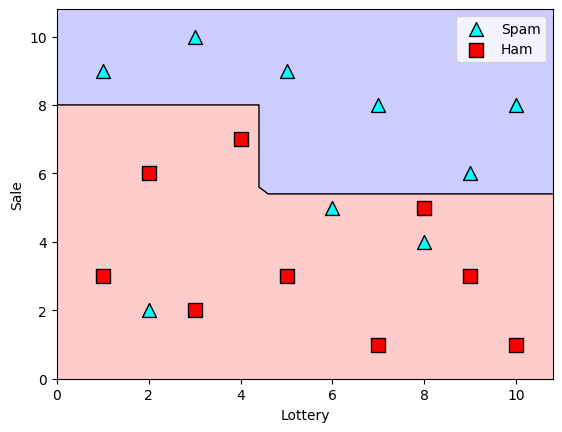

In [81]:
# combine the weak_learners into strong one
class StrongLearner():
  def __init__(self, weak_learners):
    self.weak_learners = weak_learners

  def predict(self, feature):
    preds = np.zeros((len(feature)))
    for wl in self.weak_learners:
      # pred is 1-D array, same len as feature
      pred = wl.predict(feature)
      # print(pred)
      preds = preds + pred

    # we have 3 weak learners, if 2 out of 3 got 0 then return 0
    # if 2 out of 3 got 1 then return 1
    threshold = len(self.weak_learners)/2
    return np.where(preds>threshold, 1, 0)

strong_learner = StrongLearner(weak_learners=weak_learners)
plot_model(features, labels, strong_learner)